importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_error
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller


Stocks_Name

In [ ]:
tickers = ["INFY.NS","TCS.NS","ITC.NS"] #Infosys, TCS, ITC

Extracting five years data

In [ ]:
stocks_data = yf.download(tickers,period='5y') #download the dataset

[*********************100%***********************]  3 of 3 completed


In [ ]:
stocks_data.columns

MultiIndex([( 'Close', 'INFY.NS'),
            ( 'Close',  'ITC.NS'),
            ( 'Close',  'TCS.NS'),
            (  'High', 'INFY.NS'),
            (  'High',  'ITC.NS'),
            (  'High',  'TCS.NS'),
            (   'Low', 'INFY.NS'),
            (   'Low',  'ITC.NS'),
            (   'Low',  'TCS.NS'),
            (  'Open', 'INFY.NS'),
            (  'Open',  'ITC.NS'),
            (  'Open',  'TCS.NS'),
            ('Volume', 'INFY.NS'),
            ('Volume',  'ITC.NS'),
            ('Volume',  'TCS.NS')],
           names=['Price', 'Ticker'])

Close_value_dataset

In [ ]:
stocks_data_close=stocks_data['Close'] #close value dataset

In [ ]:
stocks_data_close.head()

Ticker,INFY.NS,ITC.NS,TCS.NS
Date,,,
2020-01-13,688.269409,193.935959,2031.815186
2020-01-14,690.137695,197.178360,2047.166992
2020-01-15,682.930725,196.489349,2065.719482
2020-01-16,682.441467,195.151855,2076.758301
2020-01-17,683.197754,194.503387,2058.483643


In [ ]:
stocks_data_close.isnull().sum()

,0
Ticker,
INFY.NS,0
ITC.NS,0
TCS.NS,0


Plotting stock prices with time

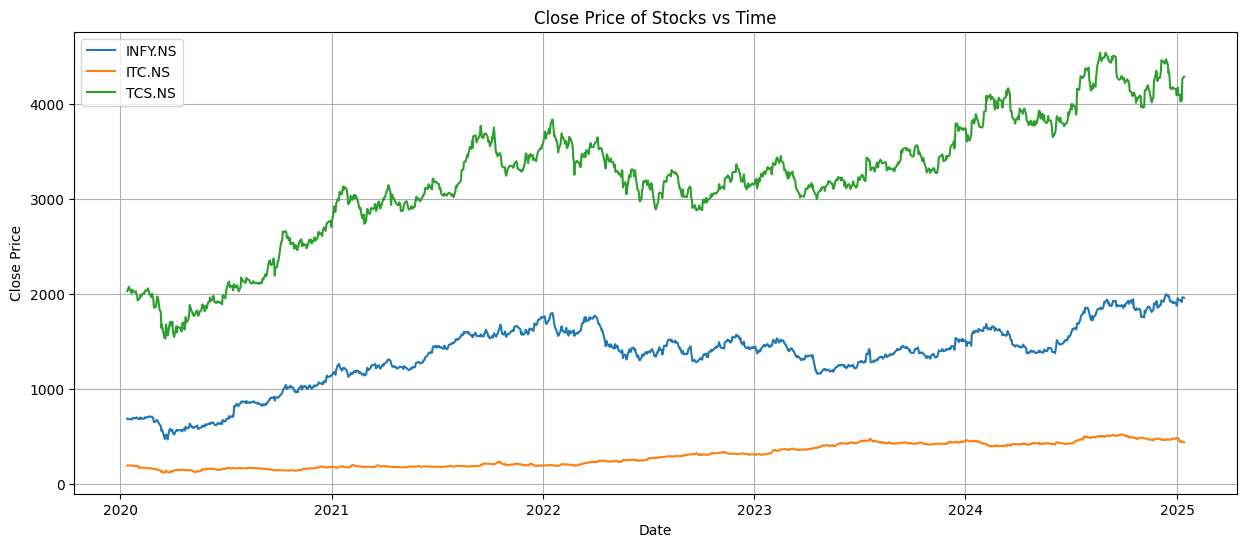

In [ ]:


# Plotting Price vs Time
plt.figure(figsize=(15, 6))
for column in stocks_data_close.columns:
    plt.plot(stocks_data_close.index, stocks_data_close[column], label=column)

plt.title("Close Price of Stocks vs Time")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.grid(True)
plt.show()


Statistical parameters

In [ ]:
stocks_data_close.describe()

Ticker,INFY.NS,ITC.NS,TCS.NS
count,1239.000000,1239.000000,1239.000000
mean,1352.656543,296.960463,3203.385222
std,341.458004,121.851556,668.254369
min,468.411102,119.360794,1532.475464
25%,1216.653320,184.006104,2958.416016
50%,1409.570801,274.137360,3245.930664
75%,1572.691101,423.964981,3614.269531
max,1999.699951,522.750000,4542.667969


Seasonal decompose

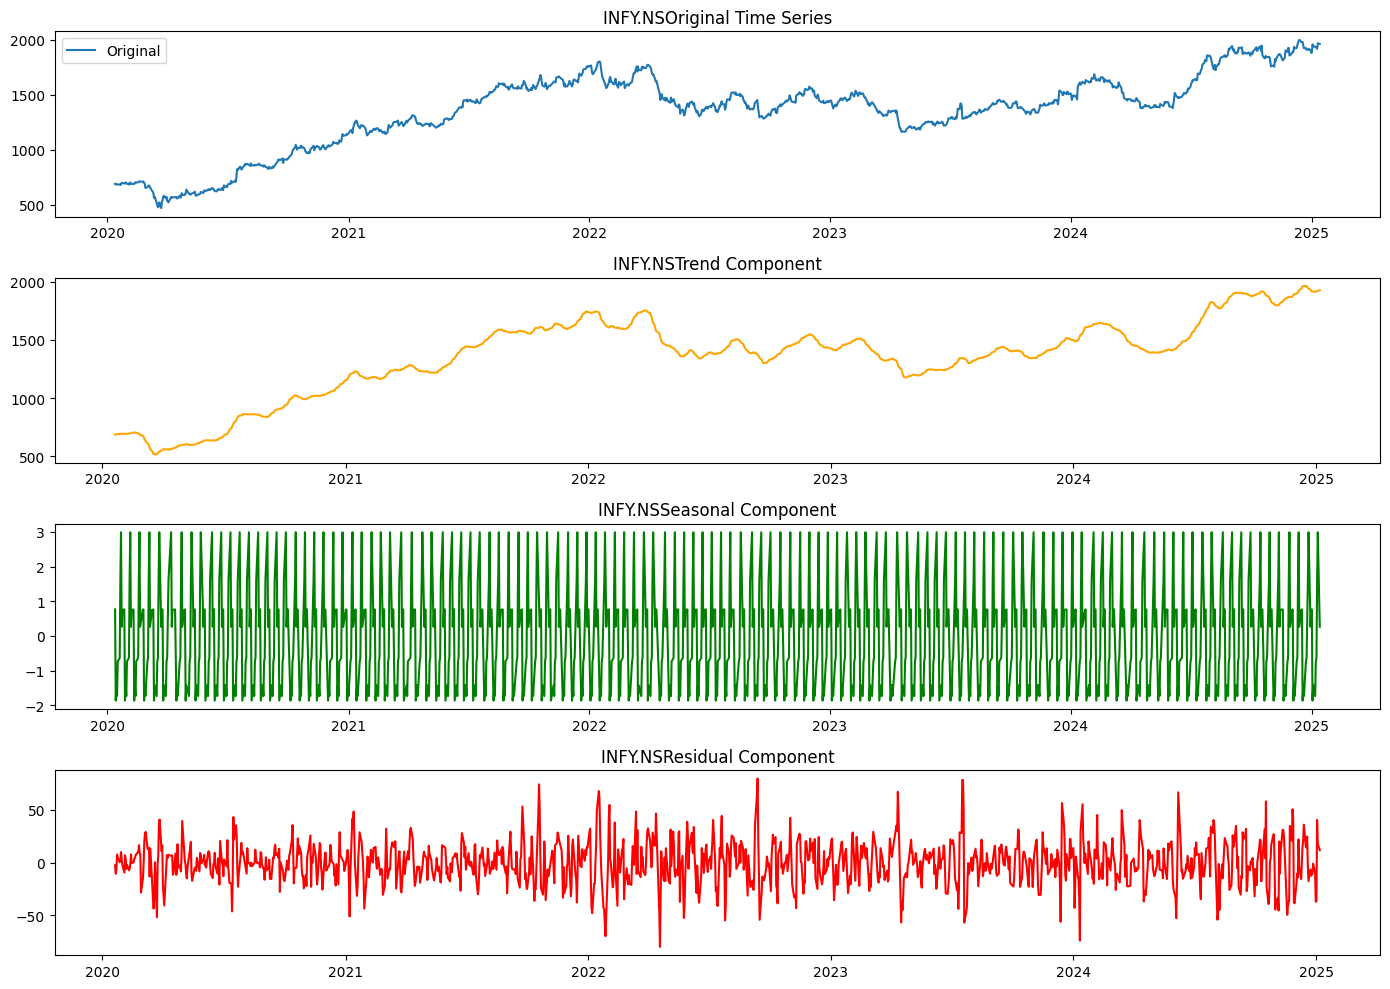

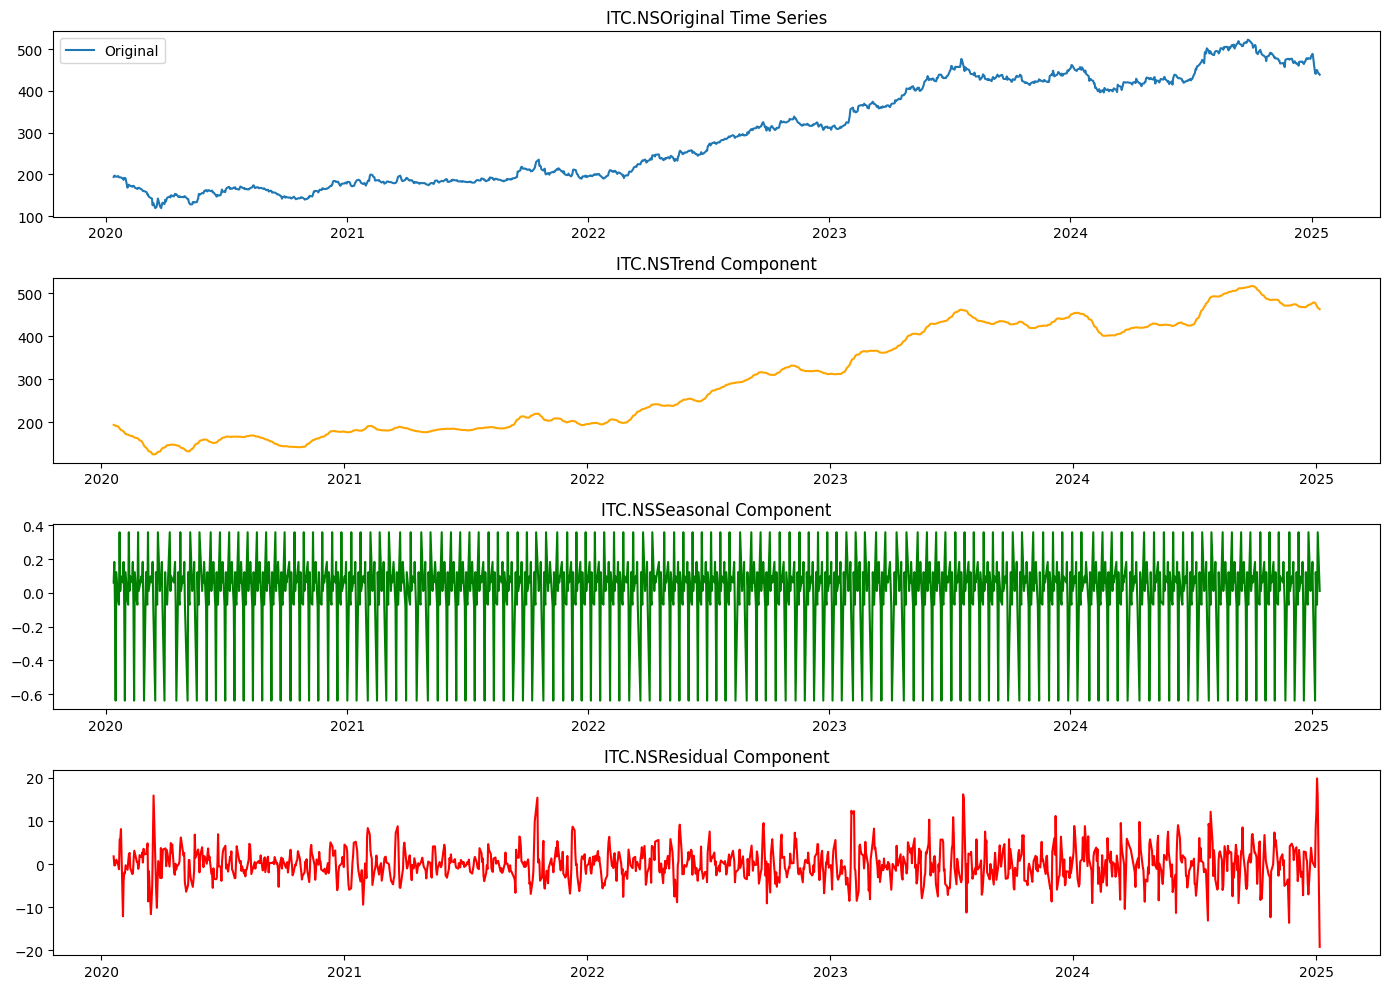

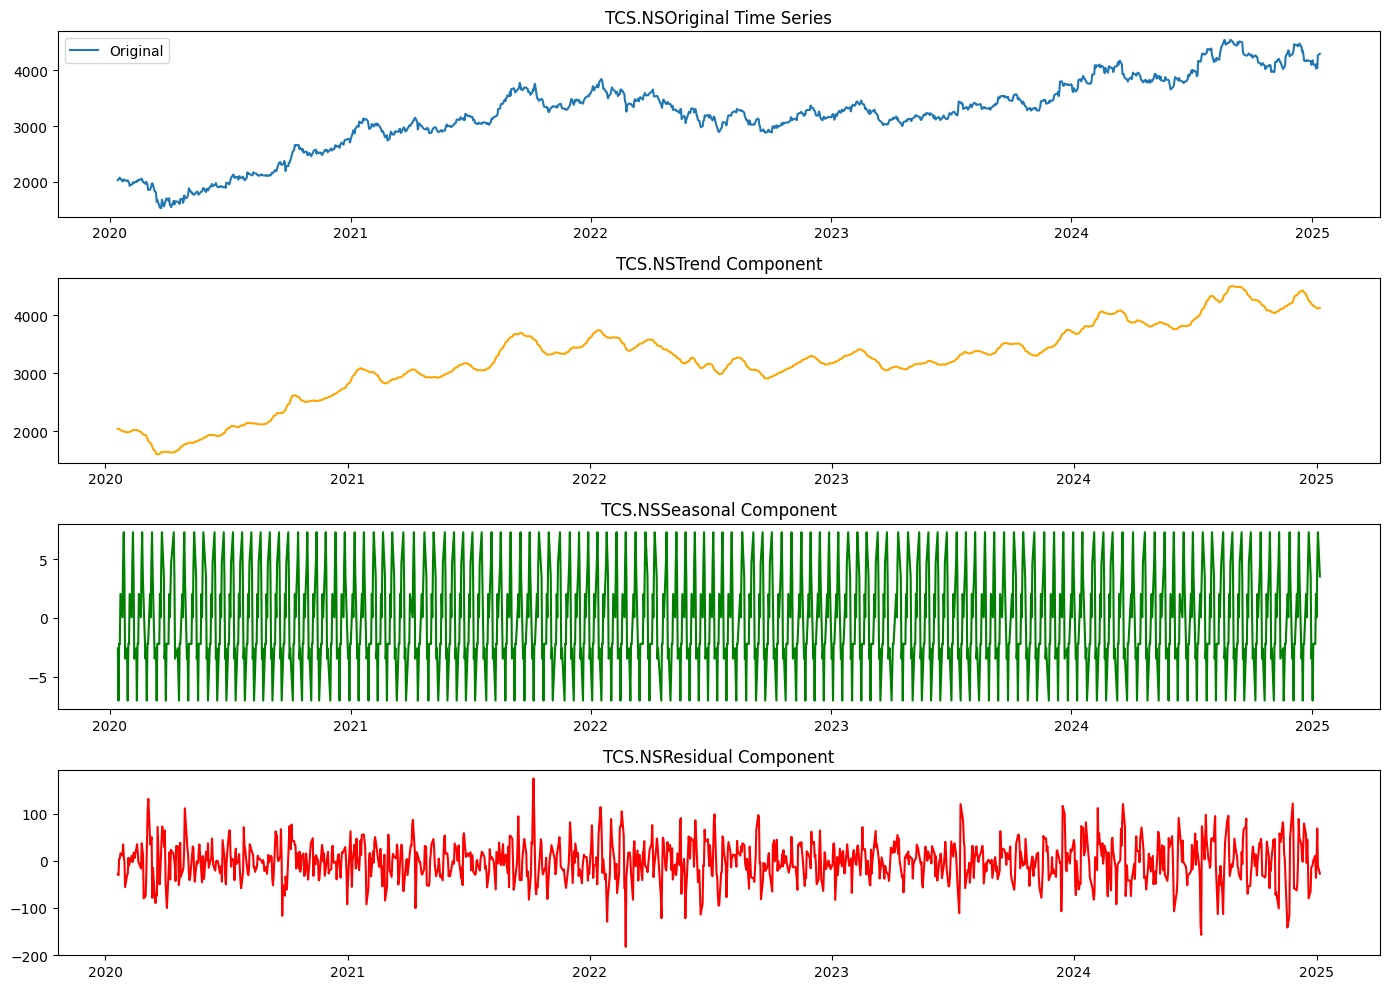

In [ ]:
for column in stocks_data_close.columns:
    decomposition = seasonal_decompose(stocks_data_close[column], period=10, model='additive')
    plt.figure(figsize=(14, 10))
    plt.subplot(411)
    plt.plot(stocks_data_close[column], label="Original")
    plt.title(f"{column}Original Time Series")# original time series
    plt.legend()

    plt.subplot(412)
    plt.plot(decomposition.trend, color='orange')
    plt.title(f"{column}Trend Component")# trend component

    plt.subplot(413)
    plt.plot(decomposition.seasonal, color='green')
    plt.title(f"{column}Seasonal Component")# seasonal component

    plt.subplot(414)
    plt.plot(decomposition.resid, color='red')
    plt.title(f"{column}Residual Component")# residual coomponent

    plt.tight_layout()
    plt.show()


ADF-Test To Check Stationarity

In [ ]:
results = {}
for column in stocks_data_close.columns:
    adf_result = adfuller(stocks_data_close[column])
    results[column] = {
        'ADF Statistic': adf_result[0],#
        'p-value': adf_result[1],

    }

In [ ]:
print(results)

{'INFY.NS': {'ADF Statistic': -1.2856828713734714, 'p-value': 0.6356966985817081}, 'ITC.NS': {'ADF Statistic': -0.4036070891214306, 'p-value': 0.9094947783659428}, 'TCS.NS': {'ADF Statistic': -1.2962227847864842, 'p-value': 0.6308986175660578}}


In [ ]:
for column in stocks_data_close.columns:
  if results[column]['p-value'] < 0.05:
    print(f"{column} is stationary. reject null")
  else:
    print(f"{column} is non-stationary. failed to reject null")

INFY.NS is non-stationary. failed to reject null
ITC.NS is non-stationary. failed to reject null
TCS.NS is non-stationary. failed to reject null


Differencing to make data stationary

In [ ]:
for column in stocks_data_close.columns:
  stocks_data_close[f"{column}_diff"] = stocks_data_close[column].diff()


<ipython-input-14-852be2e1e002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_close[f"{column}_diff"] = stocks_data_close[column].diff()
<ipython-input-14-852be2e1e002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_close[f"{column}_diff"] = stocks_data_close[column].diff()
<ipython-input-14-852be2e1e002>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

In [ ]:
stocks_data_close.dropna(inplace=True)

<ipython-input-15-832ff0e30f33>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stocks_data_close.dropna(inplace=True)


In [ ]:
stocks_data_close.head()

Ticker,INFY.NS,ITC.NS,TCS.NS,INFY.NS_diff,ITC.NS_diff,TCS.NS_diff
Date,,,,,,
2020-01-14,690.137695,197.178360,2047.166992,1.868286,3.242401,15.351807
2020-01-15,682.930725,196.489349,2065.719482,-7.206970,-0.689011,18.552490
2020-01-16,682.441467,195.151855,2076.758301,-0.489258,-1.337494,11.038818
2020-01-17,683.197754,194.503387,2058.483643,0.756287,-0.648468,-18.274658
2020-01-20,683.731567,196.084061,2013.262451,0.533813,1.580673,-45.221191


Retesting for stationarity after difference

In [ ]:
results_with_retest = {}
for column in stocks_data_close.columns:
    if column.endswith('_diff'):
        adf_result = adfuller(stocks_data_close[column])
        results_with_retest[column] = {
            'ADF Statistic': adf_result[0],
            'p-value': adf_result[1],
        }

In [ ]:
for column in results_with_retest.keys():
  if results_with_retest[column]['p-value'] < 0.05:
    print(f"{column} is stationary. reject null")
  else:
    print(f"{column} is non-stationary. failed to reject null")

INFY.NS_diff is stationary. reject null
ITC.NS_diff is stationary. reject null
TCS.NS_diff is stationary. reject null


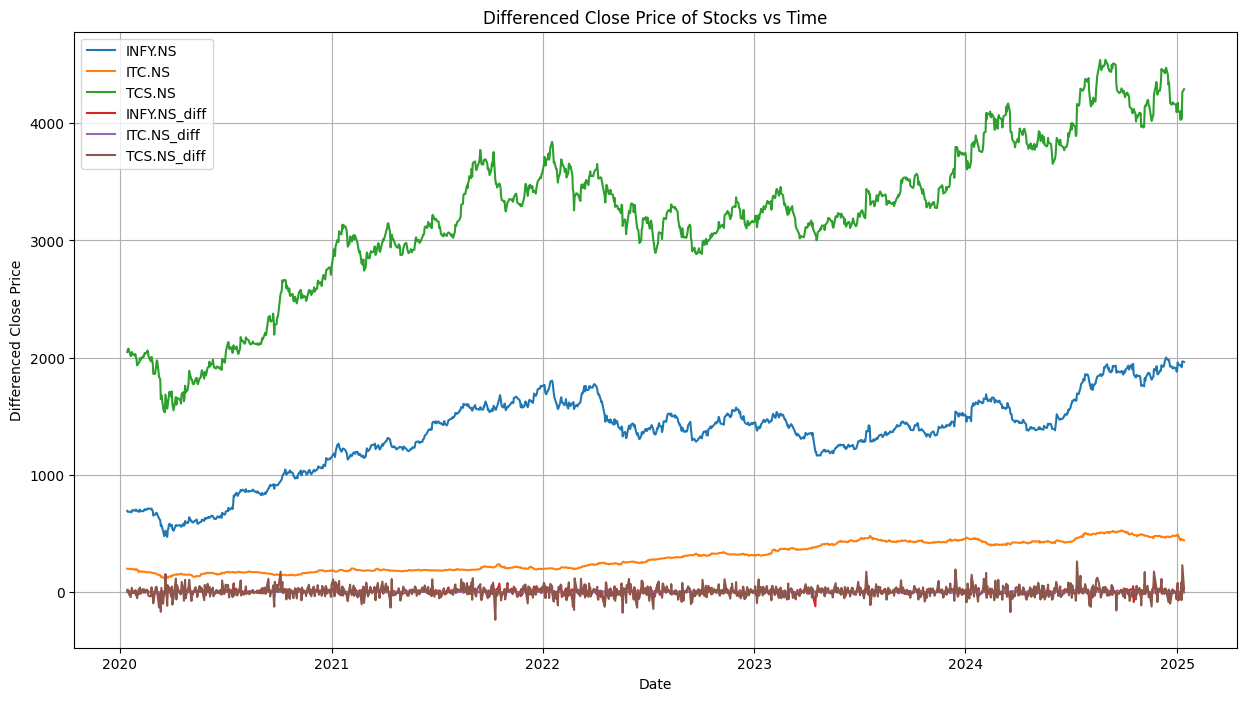

In [ ]:
plt.figure(figsize=(15, 8))
for column in stocks_data_close.columns:
        plt.plot(stocks_data_close.index, stocks_data_close[column], label=column)
plt.title("Differenced Close Price of Stocks vs Time")
plt.xlabel("Date")
plt.ylabel("Differenced Close Price")
plt.legend()
plt.grid(True)
plt.show()

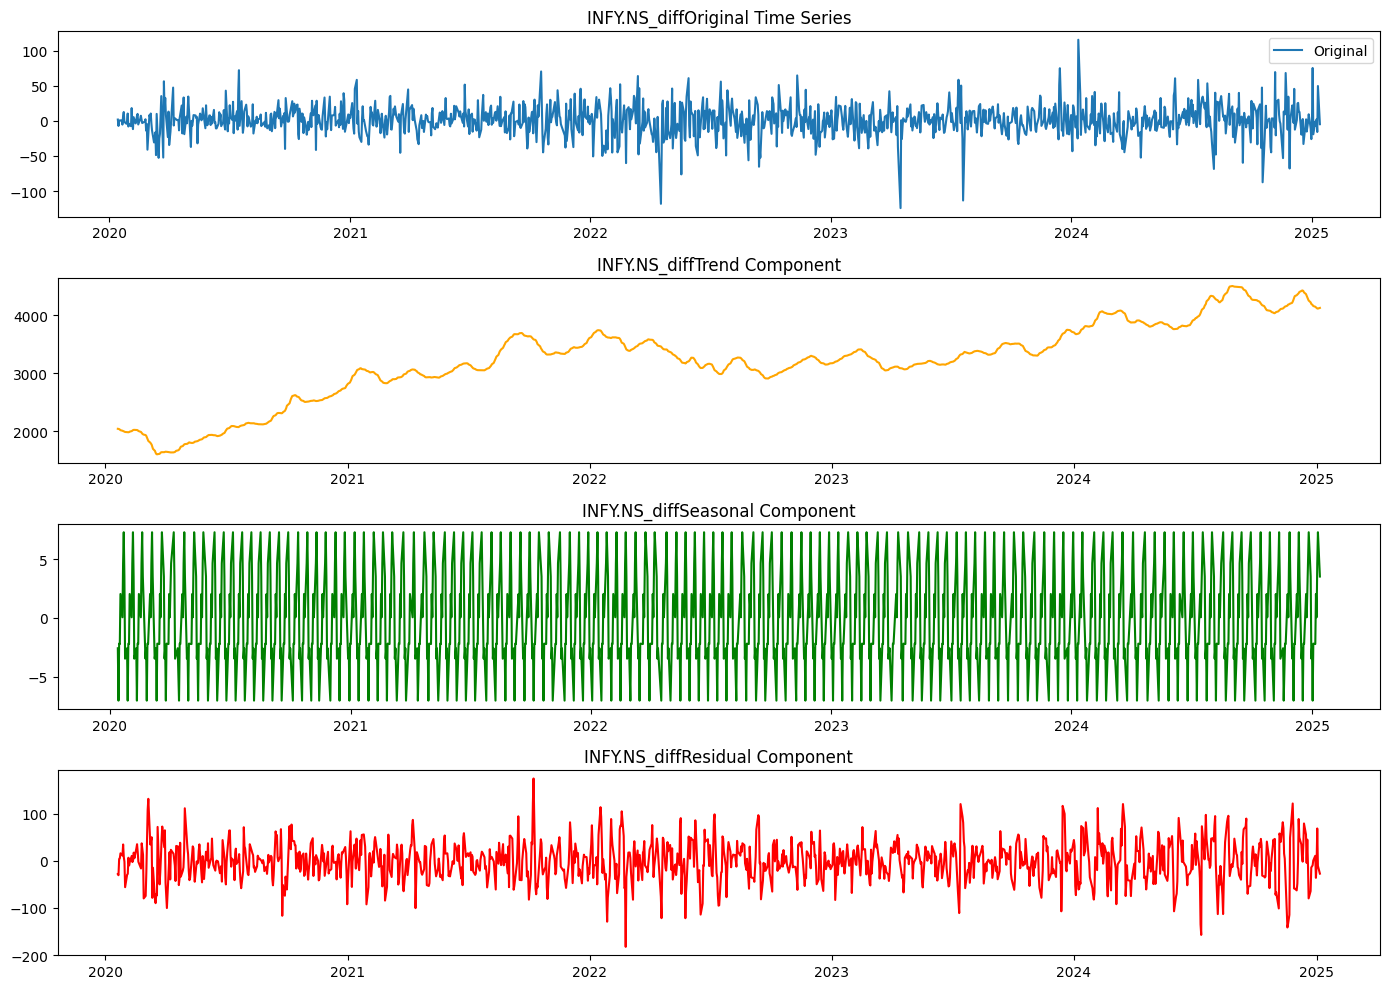

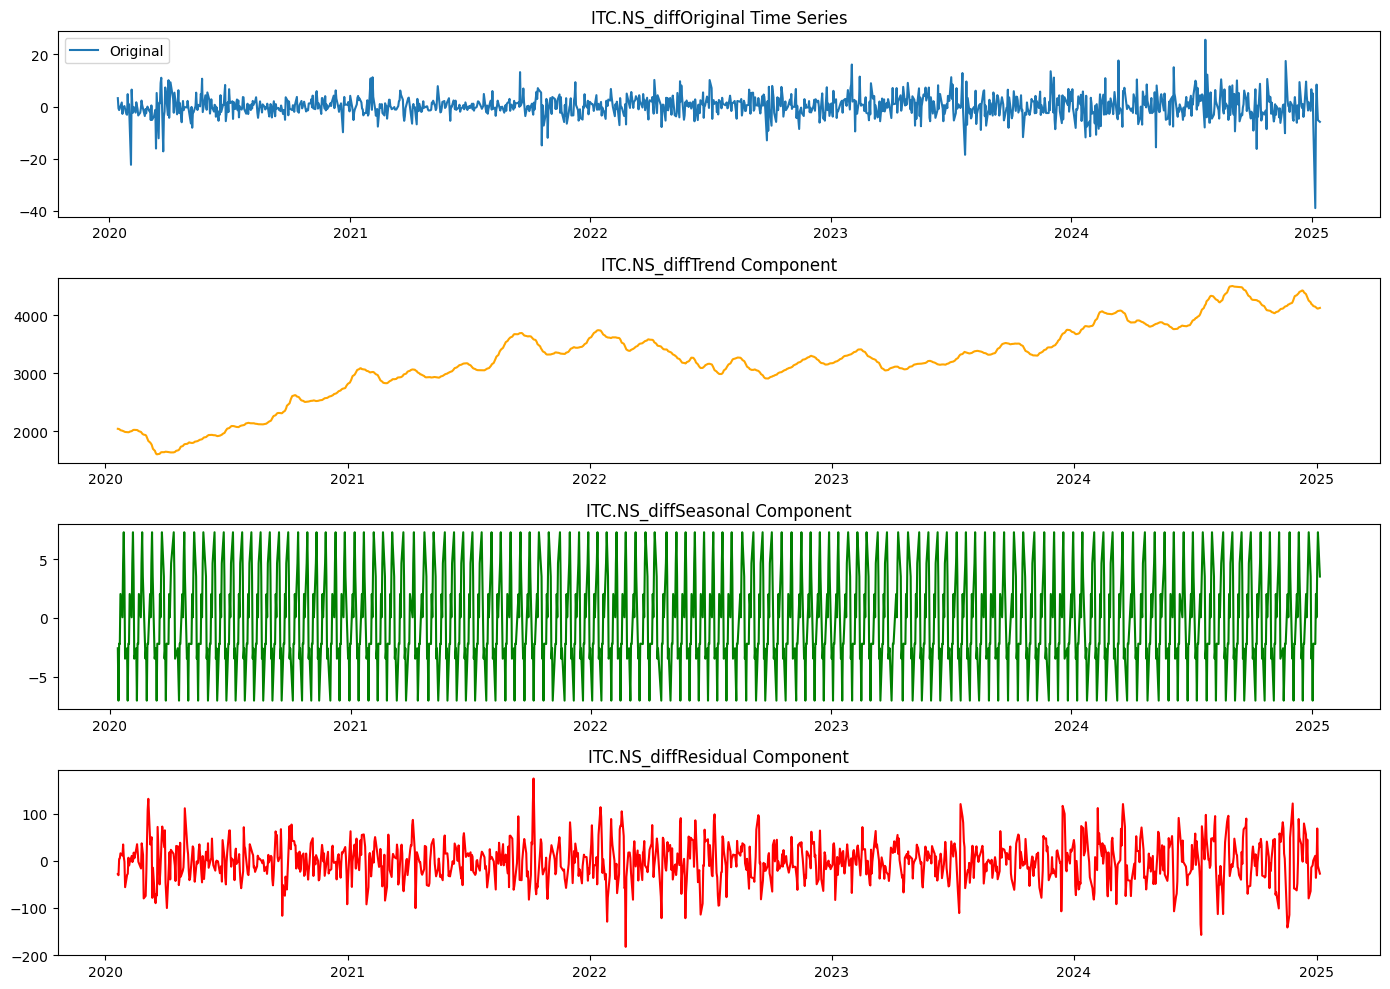

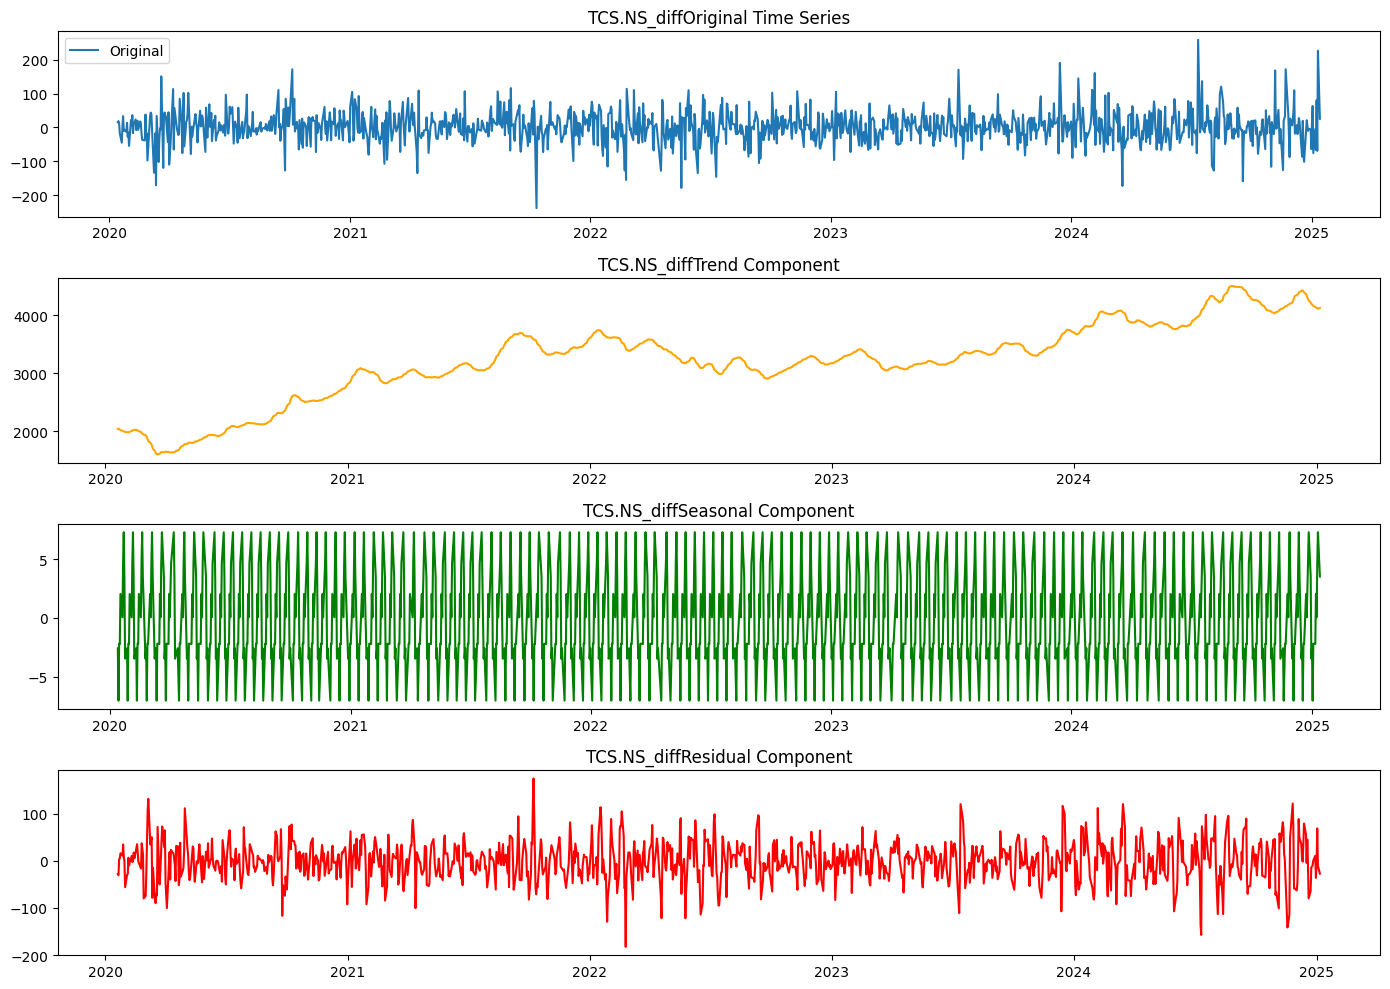

In [ ]:
for column in stocks_data_close.columns:
    if column.endswith('_diff'):
        decomposition_after_diff = seasonal_decompose(stocks_data_close[column],period=30, model='additive')
        plt.figure(figsize=(14, 10))
        plt.subplot(411)
        plt.plot(stocks_data_close[column], label="Original")
        plt.title(f"{column}Original Time Series")
        plt.legend()

        plt.subplot(412)
        plt.plot(decomposition.trend, color='orange')
        plt.title(f"{column}Trend Component")

        plt.subplot(413)
        plt.plot(decomposition.seasonal, color='green')
        plt.title(f"{column}Seasonal Component")

        plt.subplot(414)
        plt.plot(decomposition.resid, color='red')
        plt.title(f"{column}Residual Component")

        plt.tight_layout()
        plt.show()

PLotting ACF and PACF

<Figure size 1400x800 with 0 Axes>

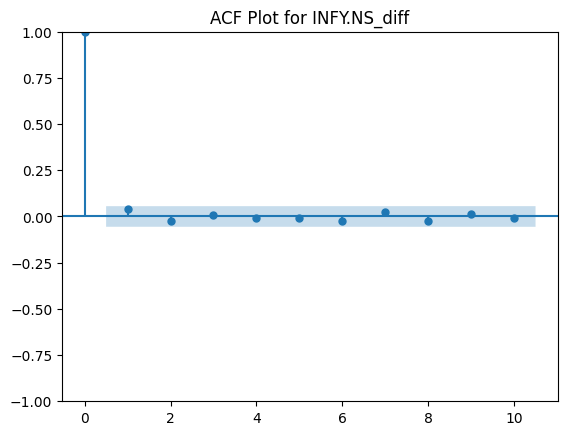

<Figure size 1400x800 with 0 Axes>

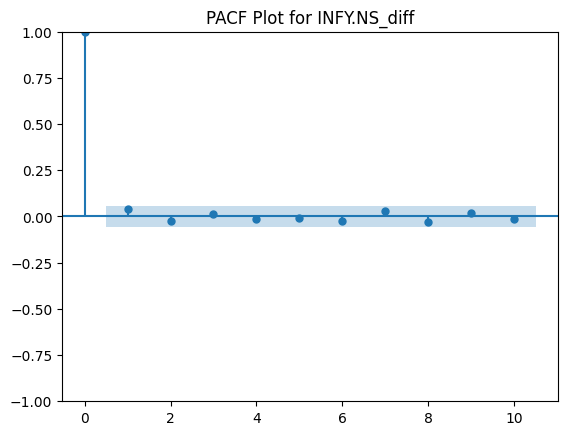

<Figure size 1400x800 with 0 Axes>

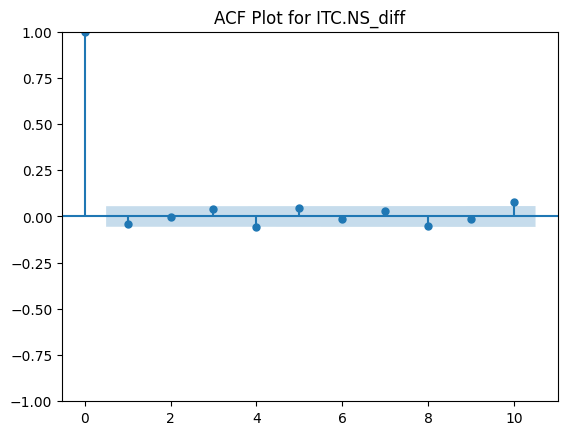

<Figure size 1400x800 with 0 Axes>

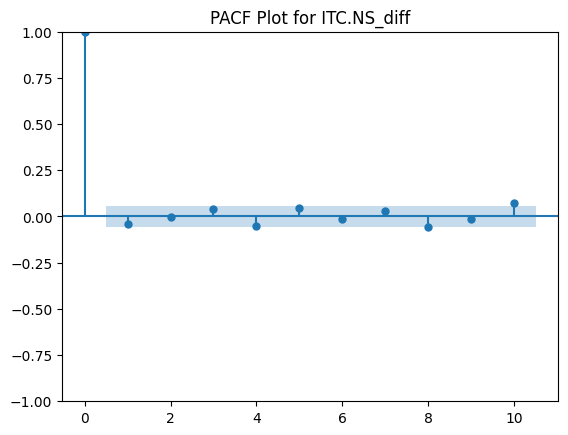

<Figure size 1400x800 with 0 Axes>

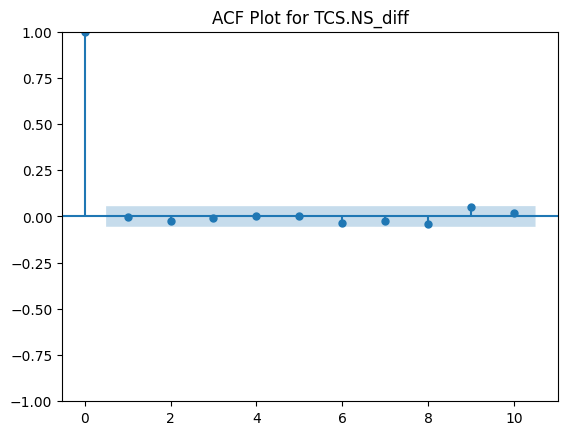

<Figure size 1400x800 with 0 Axes>

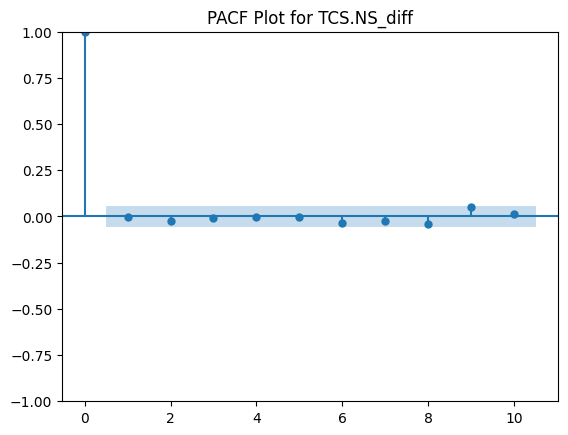

In [ ]:
for column in stocks_data_close.columns:
  if column.endswith('_diff'):
    plt.figure(figsize=(14, 8))
    plot_acf(stocks_data_close[column], lags=10)
    plt.title(f"ACF Plot for {column}")
    plt.show()

    plt.figure(figsize=(14, 8))
    plot_pacf(stocks_data_close[column], lags=10)
    plt.title(f"PACF Plot for {column}")
    plt.show()


ARIMA MODEL

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


INFY.NS
                               SARIMAX Results                                
Dep. Variable:                INFY.NS   No. Observations:                 1238
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -5552.125
Date:                Mon, 13 Jan 2025   AIC                          11110.250
Time:                        16:26:41   BIC                          11125.612
Sample:                             0   HQIC                         11116.028
                               - 1238                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8294      0.123     -6.747      0.000      -1.070      -0.588
ma.L1          0.8630      0.112      7.699      0.000       0.643       1.083
sigma2       463.5572     11.400     40.664 

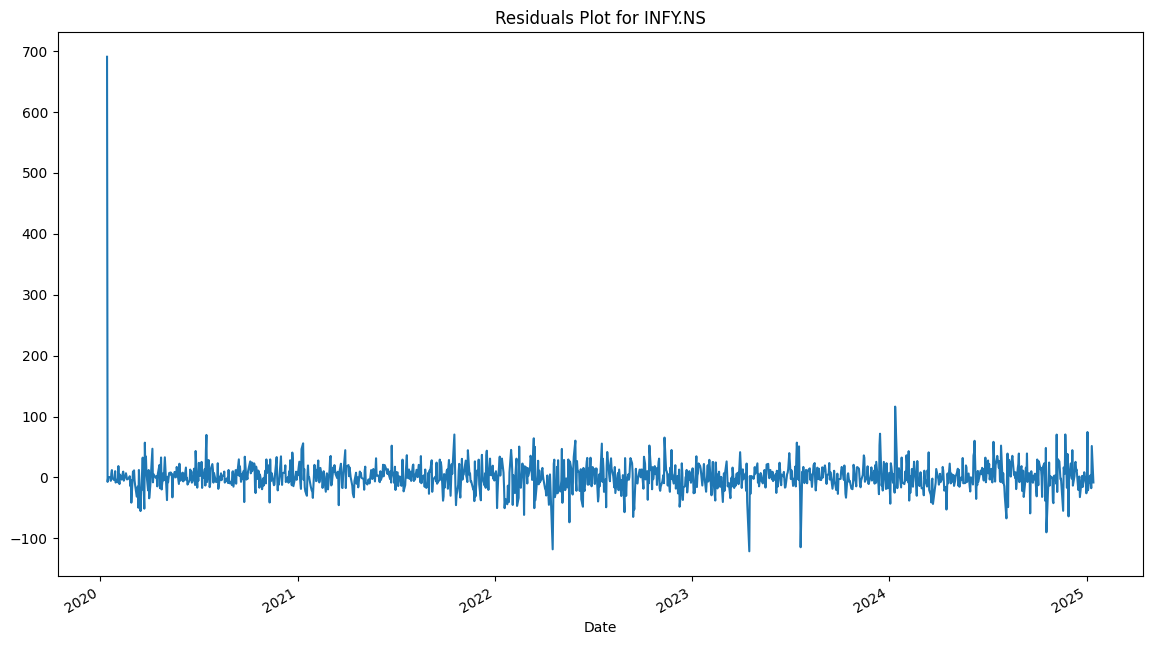

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ITC.NS
                               SARIMAX Results                                
Dep. Variable:                 ITC.NS   No. Observations:                 1238
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -3553.911
Date:                Mon, 13 Jan 2025   AIC                           7113.821
Time:                        16:26:42   BIC                           7129.183
Sample:                             0   HQIC                          7119.599
                               - 1238                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0419      0.583     -0.072      0.943      -1.185       1.101
ma.L1          0.0030      0.584      0.005      0.996      -1.142       1.148
sigma2        18.3219      0.329     55.771  

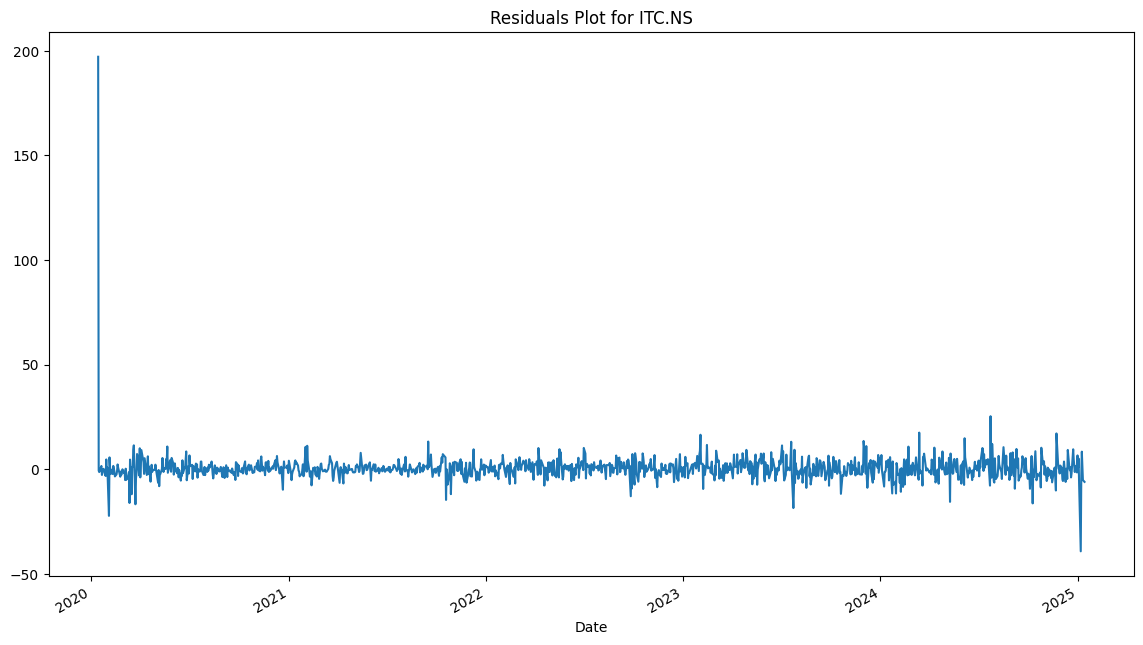

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


TCS.NS
                               SARIMAX Results                                
Dep. Variable:                 TCS.NS   No. Observations:                 1238
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -6488.079
Date:                Mon, 13 Jan 2025   AIC                          12982.158
Time:                        16:26:43   BIC                          12997.519
Sample:                             0   HQIC                         12987.935
                               - 1238                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9532      0.080     11.848      0.000       0.795       1.111
ma.L1         -0.9623      0.072    -13.370      0.000      -1.103      -0.821
sigma2      2105.3709     52.682     39.964  

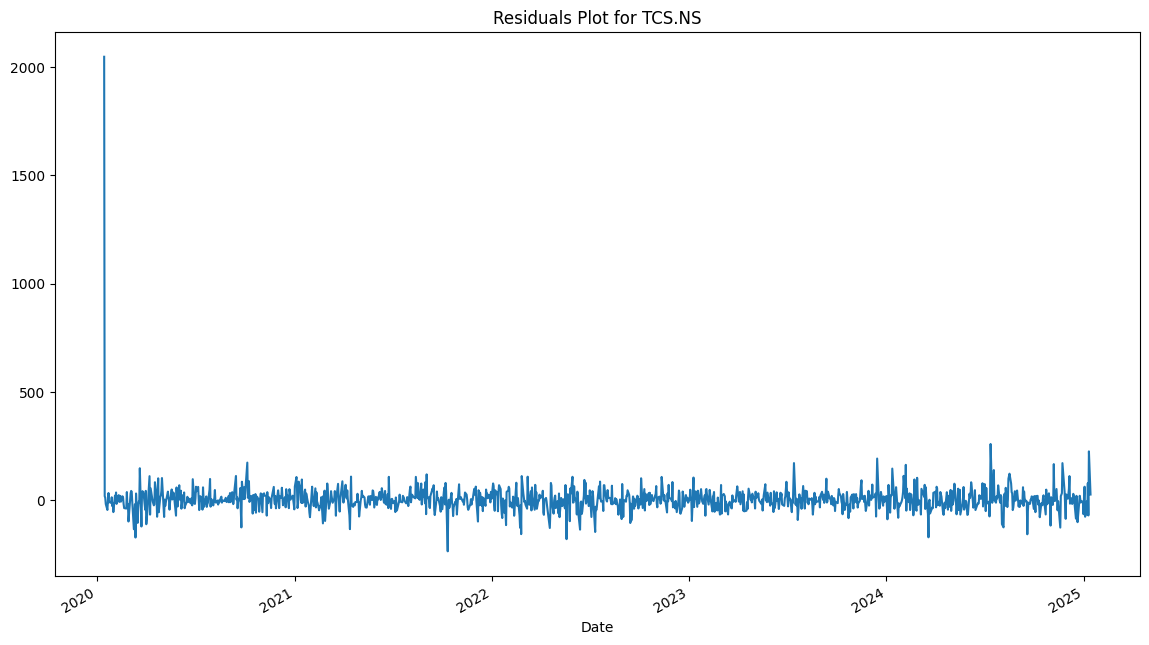

In [ ]:
for column in stocks_data_close.columns:
  if not column.endswith('_diff'):
    ARIMA_MODEL = ARIMA(stocks_data_close[column], order=(1,1,1)) #(p,q,d)
    ARIMA_MODEL_FIT = ARIMA_MODEL.fit()
    print(f"{column}")
    print(ARIMA_MODEL_FIT.summary())
    plt.figure(figsize=(14, 8))
    ARIMA_MODEL_FIT.resid.plot()
    plt.title(f"Residuals Plot for {column}")
    plt.show()

SARIMA MODEL

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


INFY.NS
                                     SARIMAX Results                                      
Dep. Variable:                            INFY.NS   No. Observations:                 1238
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -5475.639
Date:                            Mon, 13 Jan 2025   AIC                          10961.279
Time:                                    16:31:48   BIC                          10986.758
Sample:                                         0   HQIC                         10970.874
                                           - 1238                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8281      0.141     -5.874      0.000      -1.104      -0.552
ma.L1          0.8598      

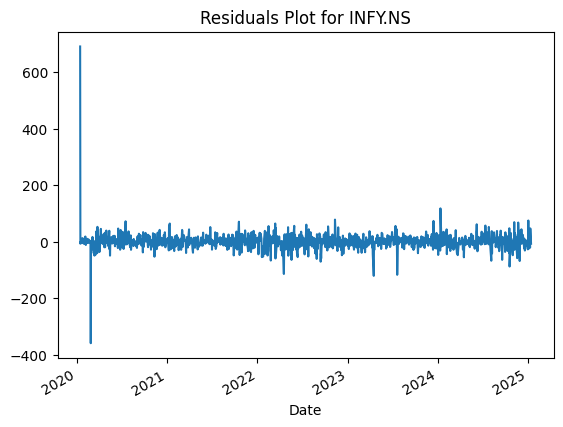

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ITC.NS
                                     SARIMAX Results                                      
Dep. Variable:                             ITC.NS   No. Observations:                 1238
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -3521.288
Date:                            Mon, 13 Jan 2025   AIC                           7052.577
Time:                                    16:32:14   BIC                           7078.056
Sample:                                         0   HQIC                          7062.172
                                           - 1238                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0154      0.563     -0.027      0.978      -1.119       1.088
ma.L1         -0.0274      0

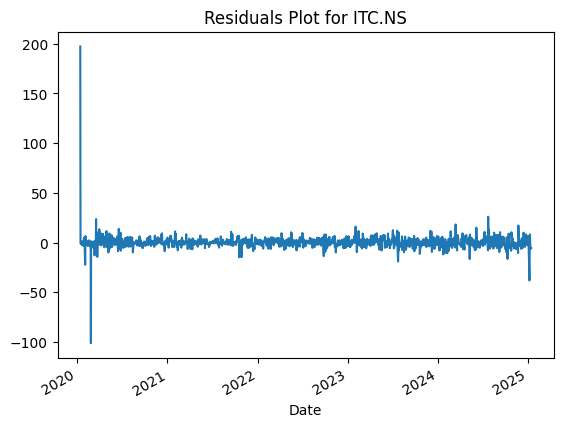

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


TCS.NS
                                     SARIMAX Results                                      
Dep. Variable:                             TCS.NS   No. Observations:                 1238
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 30)   Log Likelihood               -6386.655
Date:                            Mon, 13 Jan 2025   AIC                          12783.311
Time:                                    16:32:58   BIC                          12808.790
Sample:                                         0   HQIC                         12792.906
                                           - 1238                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8802      0.221     -3.978      0.000      -1.314      -0.447
ma.L1          0.8942      0

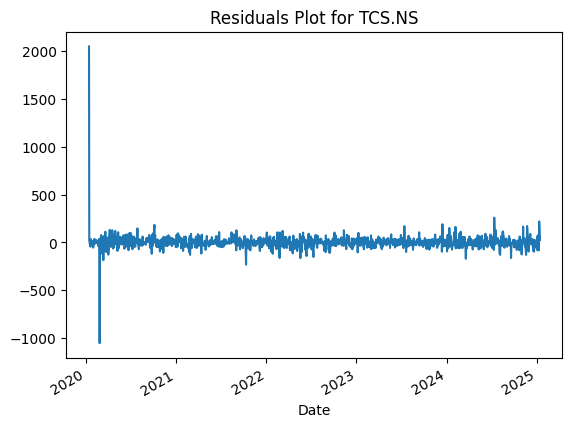

In [ ]:
for column in stocks_data_close.columns:
  if not column.endswith('_diff'):
    SARIMA_MODEL = SARIMAX(stocks_data_close[column], order=(1,1,1), seasonal_order=(1,1,1,30)) #(p,q,d,s)
    SARIMA_MODEL_FIT = SARIMA_MODEL.fit()
    print(f"{column}")
    print(SARIMA_MODEL_FIT.summary())
    SARIMA_MODEL_FIT.resid.plot() # residual plot
    plt.show()

Prediction and Forecasting

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

INFY.NS - ARIMA RMSE: 283.07, ARIMA MAE: 236.42
INFY.NS - SARIMA RMSE: 187.43, SARIMA MAE: 168.87


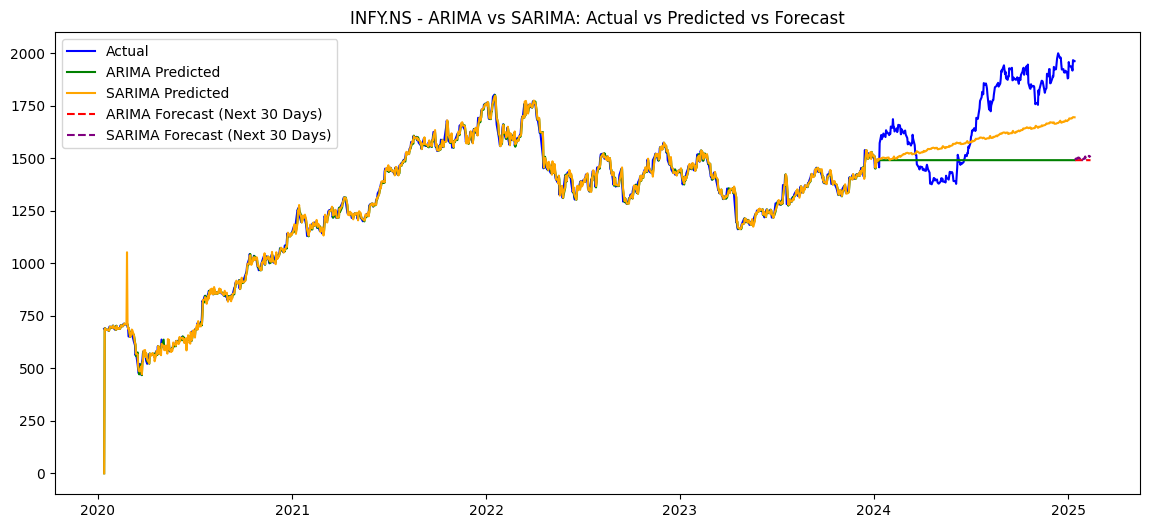

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

TCS.NS - ARIMA RMSE: 514.72, ARIMA MAE: 460.47
TCS.NS - SARIMA RMSE: 313.11, SARIMA MAE: 257.58


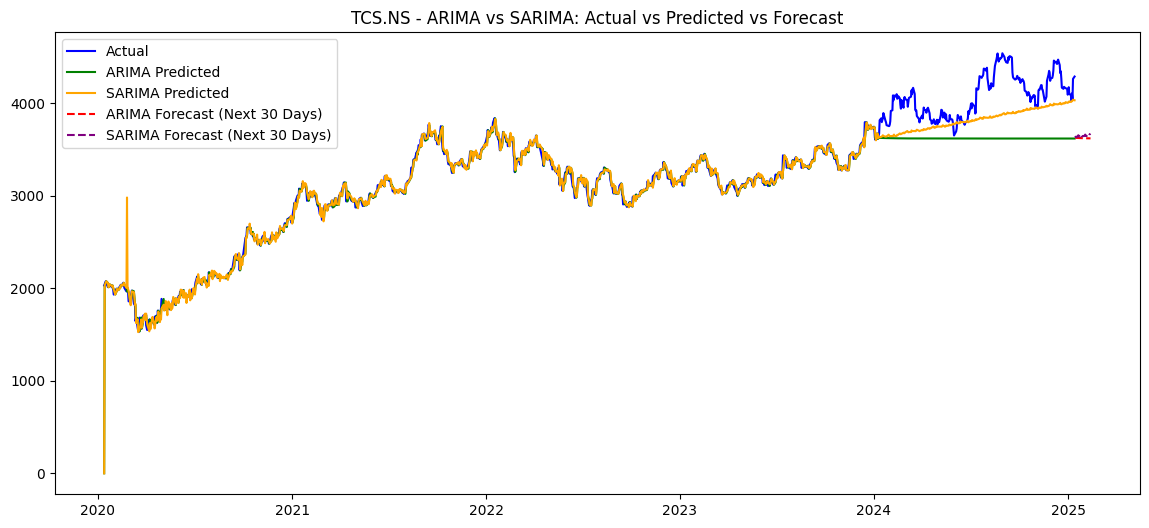

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/p

ITC.NS - ARIMA RMSE: 36.69, ARIMA MAE: 32.64
ITC.NS - SARIMA RMSE: 46.95, SARIMA MAE: 40.09


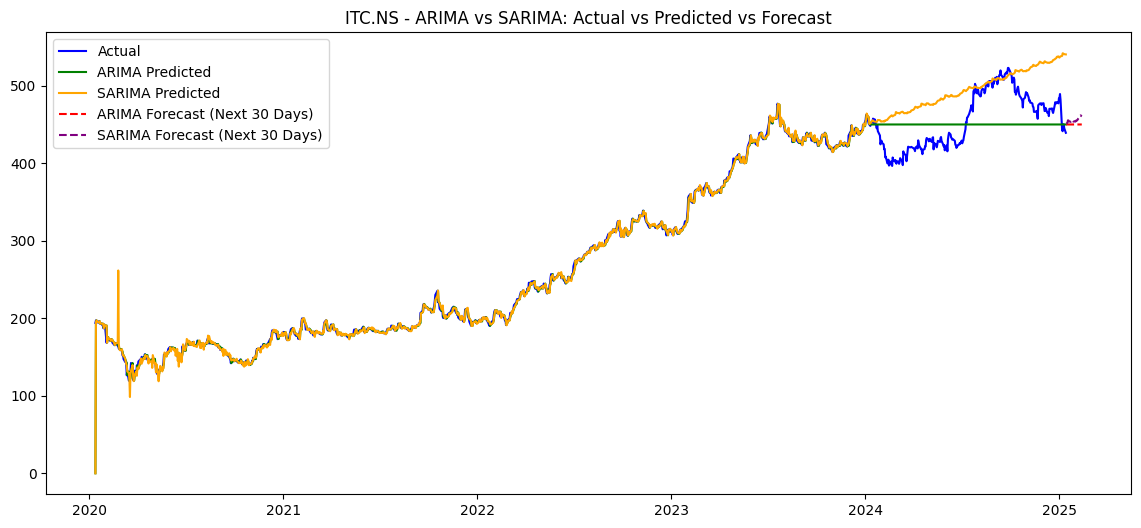

In [ ]:

results_final = {}
stocks_data_close = stocks_data.loc[:, ('Close')] # getting close price dataset
for ticker in tickers: # tickers
    close = stocks_data_close[ticker]

# split train(80%) and test(20%)
    train_size = int(len(close) * 0.8)
    close_train, close_test = close[:train_size], close[train_size:]


#  Fit ARIMA model (Non-seasonal)
    arima_model = ARIMA(close_train, order=(1, 1, 1))  # (p, d, q) for ARIMA
    arima_fit = arima_model.fit()

# Predict on the entire dataset  using ARIMA
    arima_predictions = arima_fit.predict(start=0, end=len(close) - 1, typ='levels') # (p,q,d) for ARIMA

# Compute error metrics for ARIMA
    rmse_arima = np.sqrt(mean_squared_error(close_test, arima_predictions[train_size:]))
    mae_arima = mean_absolute_error(close_test, arima_predictions[train_size:])


# Fit SARIMA model (Seasonal)
    sarima_model = SARIMAX(close_train, order=(1, 1, 1), seasonal_order=(1, 1, 1, 30))  # (p, d, q, s) for SARIMA
    sarima_fit = sarima_model.fit(disp=False)

# Predict on the entire dataset using SARIMA
    sarima_predictions = sarima_fit.predict(start=0, end=len(close) - 1, typ='levels')

# Compute error metrics for SARIMA
    rmse_sarima = np.sqrt(mean_squared_error(close_test, sarima_predictions[train_size:]))
    mae_sarima = mean_absolute_error(close_test, sarima_predictions[train_size:])

# RMSE and MAE for ARIMA AND  SARIMA
    print(f"{ticker} - ARIMA RMSE: {rmse_arima:.2f}, ARIMA MAE: {mae_arima:.2f}")
    print(f"{ticker} - SARIMA RMSE: {rmse_sarima:.2f}, SARIMA MAE: {mae_sarima:.2f}")

# Forecast for the next 30 days beyond dataset range for both models

    arima_forecast = arima_fit.forecast(steps=30) # arima forecasting
    sarima_forecast = sarima_fit.forecast(steps=30) # sarima forecasting


    future_dates = pd.date_range(start=close.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')
# Store forecast results
    results_final[ticker] = {
        'arima_forecast': arima_forecast,
        'sarima_forecast': sarima_forecast,
        'future_dates': future_dates,

    }

# Plot actual vs. predicted vs. forecast for both ARIMA and SARIMA
    plt.figure(figsize=(14, 6))
    plt.plot(close.index, close, label='Actual', color='blue')
    plt.plot(close.index, arima_predictions, label='ARIMA Predicted', color='green')
    plt.plot(close.index, sarima_predictions, label='SARIMA Predicted', color='orange')
    plt.plot(future_dates, arima_forecast, label='ARIMA Forecast (Next 30 Days)', linestyle='--', color='red')
    plt.plot(future_dates, sarima_forecast, label='SARIMA Forecast (Next 30 Days)', linestyle='--', color='purple')
    plt.title(f'{ticker} - ARIMA vs SARIMA: Actual vs Predicted vs Forecast')
    plt.legend()
    plt.show()




Prediction and Forecasting after including independent variable volume

In [ ]:
result_final_volume = {}
stocks_data_volume = stocks_data.loc[:, 'Volume']  # extracting volume data

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

INFY.NS - SARIMAX RMSE: 155.04, SARIMAX MAE: 142.74


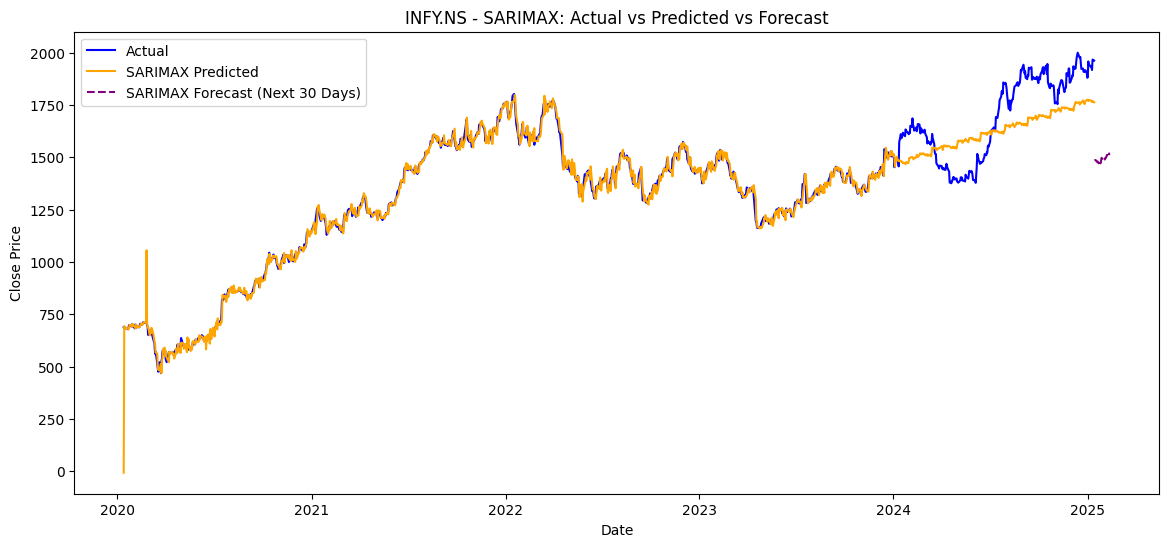

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

TCS.NS - SARIMAX RMSE: 227.40, SARIMAX MAE: 181.20


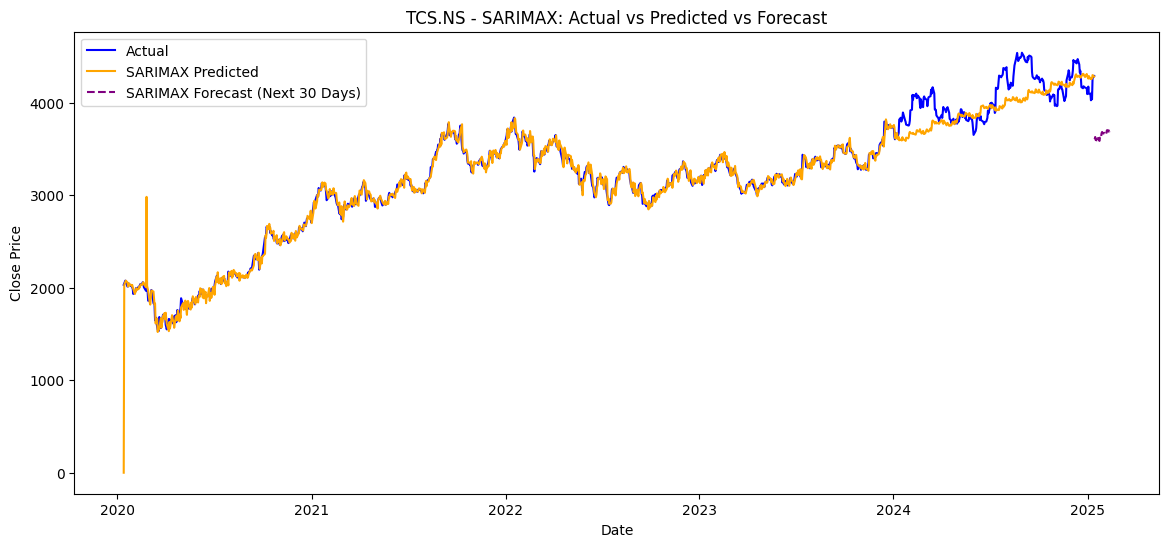

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/stat

ITC.NS - SARIMAX RMSE: 41.22, SARIMAX MAE: 35.45


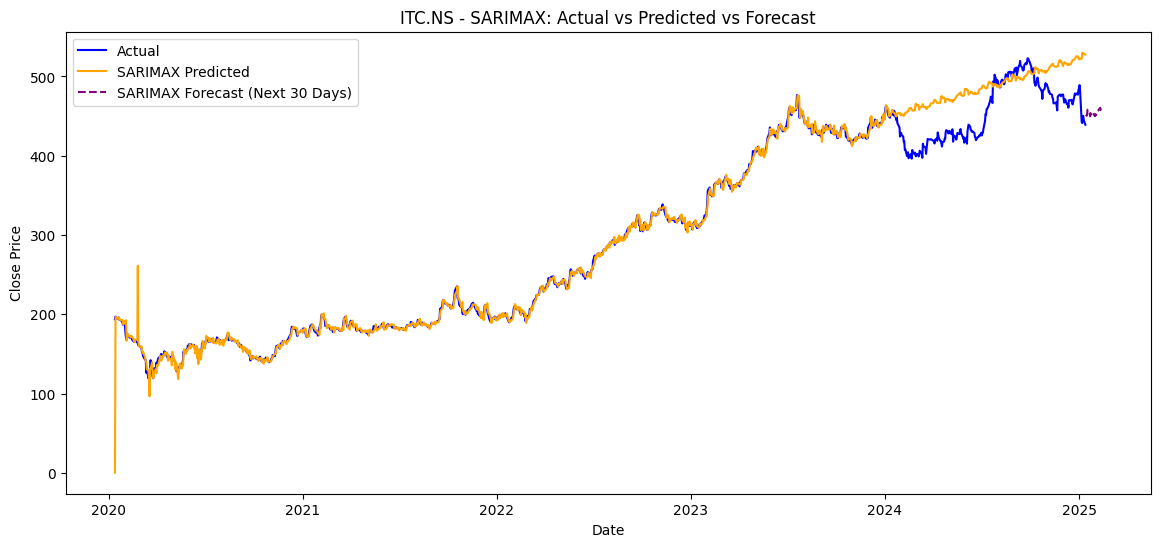

In [ ]:

for ticker in tickers:
    close = stocks_data_close[ticker]
    volume = stocks_data_volume[ticker]


# Split into training(80%) and testing(20%) sets
    train_size = int(len(close) * 0.8)
    close_train, close_test = close[:train_size], close[train_size:]
    volume_train, volume_test = volume[:train_size], volume[train_size:]

# Fit SARIMAX model (Seasonal) with "Volume" as an exogenous variable
    sarimax_model = SARIMAX(
        close_train,  # Target variable
        exog=volume_train,  # Independent variable
        order=(1, 1, 1),  # (p, d, q)
        seasonal_order=(1, 1, 1, 30)  # (P, D, Q, s)
    )
    sarimax_fit = sarimax_model.fit(disp=False)
# Predict on the entire dataset using SARIMAX
    sarimax_predictions = sarimax_fit.predict(
        start=0,
        end=len(close) - 1,
        exog=volume_test  # Use entire volume dataset
    )

# RMSE AND MASE for SARIMAX
    rmse_sarimax = np.sqrt(mean_squared_error(close_test, sarimax_predictions[train_size:]))
    mae_sarimax = mean_absolute_error(close_test, sarimax_predictions[train_size:])
    print(f"{ticker} - SARIMAX RMSE: {rmse_sarimax:.2f}, SARIMAX MAE: {mae_sarimax:.2f}")


# Forecast for the next 30 days using SARIMAX
    future_volume = volume[-30:]  # Use the last known volume values for forecasting
    sarimax_forecast = sarimax_fit.forecast(steps=30, exog=future_volume)

    future_dates = pd.date_range(start=close.index[-1] + pd.Timedelta(days=1), periods=30, freq='D')

    result_final_volume[ticker] = {
        'sarimax_forecast': sarimax_forecast,
        'future_dates': future_dates,
    }
# Plot actual vs predicted vs forecasting
    plt.figure(figsize=(14, 6))
    plt.plot(close.index, close, label='Actual', color='blue')
    plt.plot(close.index, sarimax_predictions, label='SARIMAX Predicted', color='orange')
    plt.plot(future_dates, sarimax_forecast, label='SARIMAX Forecast (Next 30 Days)', linestyle='--', color='purple')
    plt.title(f'{ticker} - SARIMAX: Actual vs Predicted vs Forecast')
    plt.legend()
    plt.xlabel('Date')
    plt.ylabel('Close Price')
    plt.show()
